In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## read results from the file

In this notebook, we will do ablation study about MF-RBF-Kriging model.


In [2]:
# read results for mf-rbf-kriging
mf_rbf_kriging_input = pd.read_csv(
    "../mf_rbf_kriging/exp_mf_rbf_input.csv", index_col=0
)
mf_rbf_kriging_output = pd.read_csv(
    "../mf_rbf_kriging/exp_mf_rbf_output.csv", index_col=0
)
# merge input and output
mf_rbf_kriging_results = pd.merge(
    mf_rbf_kriging_input, mf_rbf_kriging_output, left_index=True, right_index=True
)
# make normalized_mae and normalized_rmse to be absolute value
mf_rbf_kriging_results["normalized_mae"] = mf_rbf_kriging_results[
    "normalized_mae"
].abs()
mf_rbf_kriging_results["normalized_rmse"] = mf_rbf_kriging_results[
    "normalized_rmse"
].abs()
# remove results of "Forrestor_1b" and "Forrestor_1c"
mf_rbf_kriging_results = mf_rbf_kriging_results[
    mf_rbf_kriging_results["problem"] != "Forrester_1a"
]
mf_rbf_kriging_results = mf_rbf_kriging_results[
    mf_rbf_kriging_results["problem"] != "Forrester_1b"
]
mf_rbf_kriging_results = mf_rbf_kriging_results[
    mf_rbf_kriging_results["problem"] != "Forrester_1c"
]

# load kriging results
kriging_input = pd.read_csv(
    "../../sf_data_scarce_noiseless/exp_kriging_input.csv", index_col=0
)
kriging_output = pd.read_csv(
    "../../sf_data_scarce_noiseless/exp_kriging_output.csv", index_col=0
)
# merge input and output
kriging_results = pd.merge(
    kriging_input, kriging_output, left_index=True, right_index=True
)
# make normalized_mae and normalized_rmse to be absolute value
kriging_results["normalized_mae"] = kriging_results["normalized_mae"].abs()
kriging_results["normalized_rmse"] = kriging_results["normalized_rmse"].abs()
# remove results of "Forrestor_1a"
kriging_results = kriging_results[kriging_results["problem"] != "Forrester_1a"]

In [3]:
mf_rbf_kriging_results.problem.unique()

array(['mf_Bohachevsky', 'mf_Booth', 'mf_Borehole', 'mf_CurrinExp',
       'mf_Hartman3', 'mf_Hartman6', 'mf_Himmelblau', 'mf_Park91A',
       'mf_Park91B', 'mf_Sixhump'], dtype=object)

/tmp/ipykernel_10812/490181957.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annotations_mean = pivot_table["mean"].applymap(
/tmp/ipykernel_10812/490181957.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_table["std"].applymap("{:.2f}".format).astype(str).values


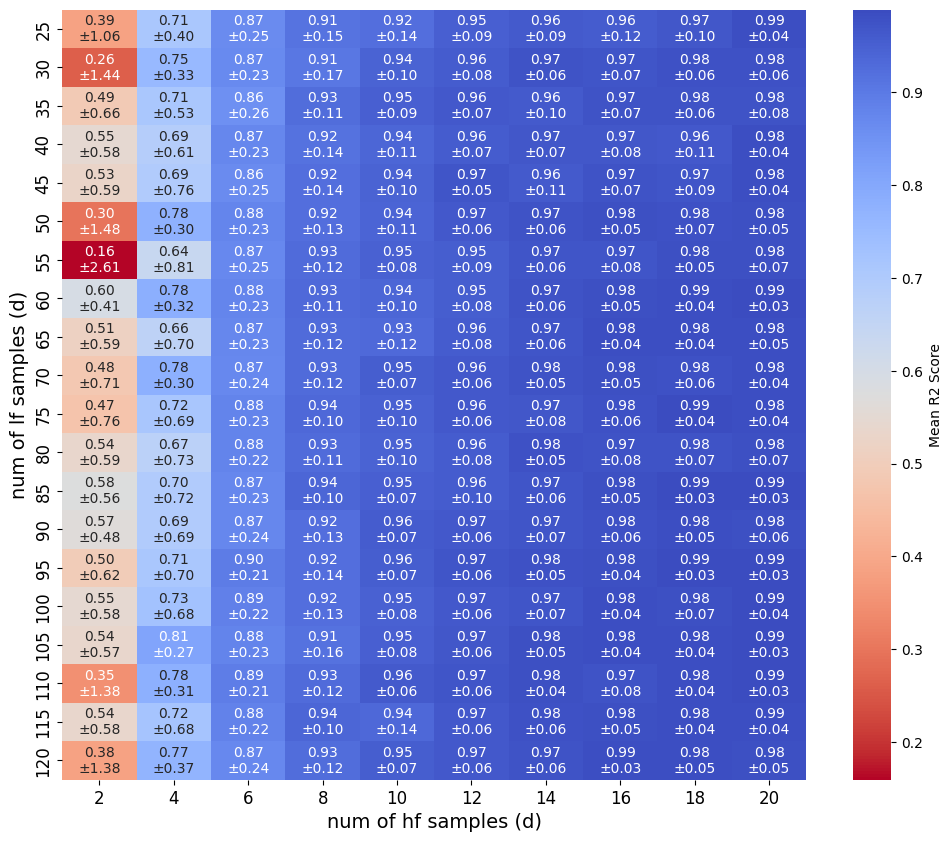

In [4]:
# Create a pivot table for num_lf, num_hf, mean, and std of r2
pivot_table = mf_rbf_kriging_results.pivot_table(
    values="r2", index="num_lf", columns="num_hf", aggfunc=["mean", "std"]
)

# Create a custom annotation array with both mean and std values
annotations_mean = pivot_table["mean"].applymap(
    "{:.2f}".format).astype(str).values
annotations_std = "±" + \
    pivot_table["std"].applymap("{:.2f}".format).astype(str).values

# Combine annotations
annotations_combined = [
    f"{m}\n{s}" for m, s in zip(annotations_mean.flatten(), annotations_std.flatten())
]
annotations_combined = np.array(
    annotations_combined).reshape(annotations_mean.shape)

# Create a combined heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    pivot_table["mean"],
    annot=annotations_combined,
    fmt="",
    cmap="coolwarm_r",
    cbar_kws={"label": "Mean R2 Score"},
)
# plt.title("R2 Score of MF-RBF-Kriging with different number of samples")
plt.xlabel("num of hf samples (d)", fontsize=14)
plt.ylabel("num of lf samples (d)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("mf_rbf_kriging_r2_score.png", dpi=300, bbox_inches="tight")
plt.savefig("mf_rbf_kriging_r2_score.pdf", dpi=300, bbox_inches="tight")
plt.savefig("mf_rbf_kriging_r2_score.svg", dpi=300, bbox_inches="tight")
plt.show()

In [24]:
# select mf_Hartman3 function
mf_rbf_kriging_results_hartman3 = mf_rbf_kriging_results[
    mf_rbf_kriging_results["problem"] == "mf_Sixhump"
]
kriging_results_hartman3 = kriging_results[kriging_results["problem"]
                                           == "mf_Sixhump"]

kriging_results_hartman3

,num_sample,problem,seed,progress,normalized_mae,normalized_rmse,r2,cpu_time
1000,2,mf_Sixhump,1,finished,4.501399,1.670957,-0.392295,0.189445
1001,4,mf_Sixhump,1,finished,1.466313,0.378762,0.928463,0.298303
1002,6,mf_Sixhump,1,finished,1.771894,0.331381,0.945241,0.377367
1003,8,mf_Sixhump,1,finished,0.840158,0.226902,0.974327,0.848768
1004,10,mf_Sixhump,1,finished,1.929433,0.381770,0.927322,0.755311
...,...,...,...,...,...,...,...,...
1095,32,mf_Sixhump,5,finished,0.028878,0.005358,0.999985,3.939472
1096,34,mf_Sixhump,5,finished,0.107038,0.012852,0.999914,4.026655
1097,36,mf_Sixhump,5,finished,0.017557,0.003122,0.999995,3.705638
1098,38,mf_Sixhump,5,finished,0.098814,0.010096,0.999947,4.031094


In [37]:
# find out the case with 100d lf samples and 10d hf samples
aa = mf_rbf_kriging_results_hartman3[
    (mf_rbf_kriging_results_hartman3["num_lf"] == 100)
    & (mf_rbf_kriging_results_hartman3["num_hf"] == 8)
]
aa

,method,num_hf,num_lf,problem,seed,progress,normalized_mae,normalized_rmse,r2,cpu_time
9153,mf_rbf,8,100,mf_Sixhump,1,finished,0.381993,0.084232,0.996389,0.948110
9353,mf_rbf,8,100,mf_Sixhump,2,finished,0.490773,0.111136,0.993502,1.495418
9553,mf_rbf,8,100,mf_Sixhump,3,finished,0.722574,0.232888,0.970755,0.857855
9753,mf_rbf,8,100,mf_Sixhump,4,finished,0.343038,0.066625,0.997676,1.154894
9953,mf_rbf,8,100,mf_Sixhump,5,finished,0.754274,0.119623,0.992372,1.094619


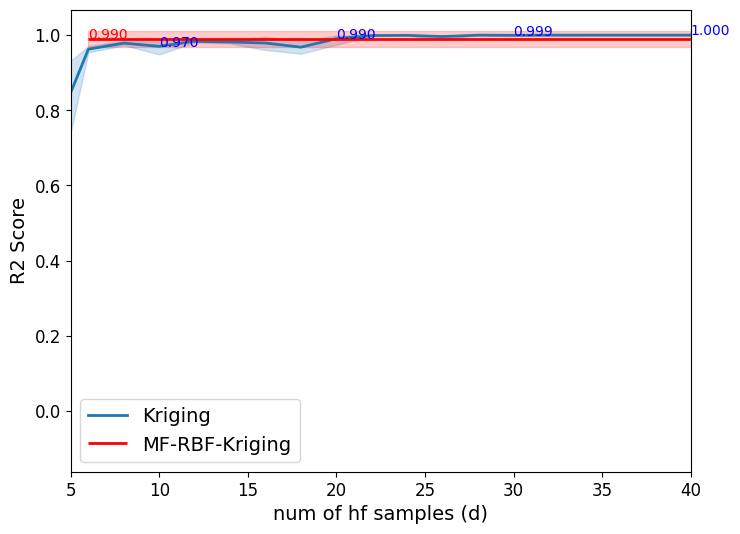

In [38]:
# plot accuracy of kriging with different number of samples
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(
    x="num_sample",
    y="r2",
    data=kriging_results_hartman3,
    label="Kriging",
    linewidth=2,
)

# plot results of mf-rbf-kriging
plt.hlines(
    y=aa["r2"].mean(),
    xmin=6,
    xmax=40,
    label="MF-RBF-Kriging",
    colors="red",
    linewidth=2,
)
plt.text(6, aa["r2"].mean() + 0.001, f"{aa['r2'].mean():.3f}", color="red")
# Calculate the average "r2" value for each num_sample
average_r2_per_sample = kriging_results_hartman3.groupby("num_sample")[
    "r2"].mean()
# Annotate each point with the average "r2" value
for i, (num_sample, average_r2) in enumerate(average_r2_per_sample.items()):
    if (i + 1) % 5 == 0:  # Show every 2nd iteration
        plt.text(num_sample, average_r2, f"{average_r2:.3f}", color="blue")


plt.fill_between(
    x=[6, 40],
    y1=aa["r2"].mean() - 1.95 * aa["r2"].std(),
    y2=aa["r2"].mean() + 1.95 * aa["r2"].std(),
    color="red",
    alpha=0.2,
)
plt.xlabel("num of hf samples (d)", fontsize=14)
plt.ylabel("R2 Score", fontsize=14)
ax.set_xlim(5, 40)
# ax.set_ylim(0.95, 1.02)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=14)
plt.show()

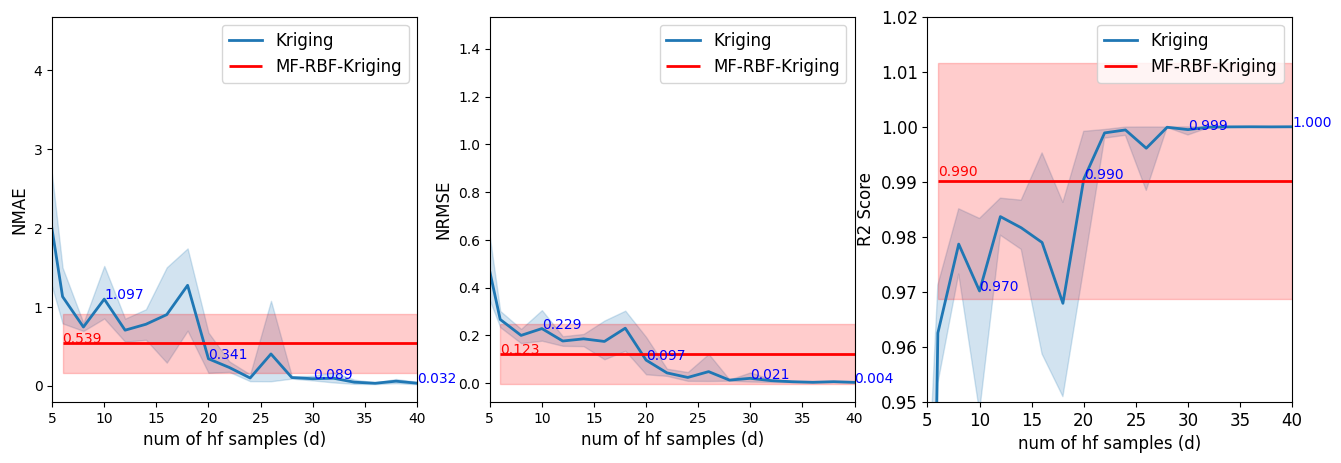

In [39]:
# same plots for normalized_mae and normalized_rmse and r2
fig, ax = plt.subplots(1, 3, figsize=(16, 5))
sns.lineplot(
    x="num_sample",
    y="normalized_mae",
    data=kriging_results_hartman3,
    label="Kriging",
    linewidth=2,
    ax=ax[0],
)
# plot results of mf-rbf-kriging
ax[0].hlines(
    y=aa["normalized_mae"].mean(),
    xmin=6,
    xmax=40,
    label="MF-RBF-Kriging",
    colors="red",
    linewidth=2,
)
ax[0].text(
    6,
    aa["normalized_mae"].mean() + 0.001,
    f"{aa['normalized_mae'].mean():.3f}",
    color="red",
)
# fill
ax[0].fill_between(
    x=[6, 40],
    y1=aa["normalized_mae"].mean() - 1.95 * aa["normalized_mae"].std(),
    y2=aa["normalized_mae"].mean() + 1.95 * aa["normalized_mae"].std(),
    color="red",
    alpha=0.2,
)

# Calculate the average "normalized_mae" value for each num_sample
average_mae_per_sample = kriging_results_hartman3.groupby("num_sample")[
    "normalized_mae"
].mean()
# Annotate each point with the average "normalized_mae" value
for i, (num_sample, average_mae) in enumerate(average_mae_per_sample.items()):
    if (i + 1) % 5 == 0:  # Show every 2nd iteration
        ax[0].text(num_sample, average_mae, f"{average_mae:.3f}", color="blue")
# plot settings
ax[0].set_xlabel("num of hf samples (d)", fontsize=12)
ax[0].set_ylabel("NMAE", fontsize=12)
ax[0].set_xlim(5, 40)
# ax[0].set_ylim(0.0, 0.02)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax[0].legend(fontsize=12)

# plot normalized_rmse
sns.lineplot(
    x="num_sample",
    y="normalized_rmse",
    data=kriging_results_hartman3,
    label="Kriging",
    linewidth=2,
    ax=ax[1],
)
# plot results of mf-rbf-kriging
ax[1].hlines(
    y=aa["normalized_rmse"].mean(),
    xmin=6,
    xmax=40,
    label="MF-RBF-Kriging",
    colors="red",
    linewidth=2,
)
ax[1].text(
    6,
    aa["normalized_rmse"].mean() + 0.001,
    f"{aa['normalized_rmse'].mean():.3f}",
    color="red",
)
# fill
ax[1].fill_between(
    x=[6, 40],
    y1=aa["normalized_rmse"].mean() - 1.95 * aa["normalized_rmse"].std(),
    y2=aa["normalized_rmse"].mean() + 1.95 * aa["normalized_rmse"].std(),
    color="red",
    alpha=0.2,
)
# Calculate the average "normalized_rmse" value for each num_sample
average_rmse_per_sample = kriging_results_hartman3.groupby("num_sample")[
    "normalized_rmse"
].mean()
# Annotate each point with the average "normalized_rmse" value
for i, (num_sample, average_rmse) in enumerate(average_rmse_per_sample.items()):
    if (i + 1) % 5 == 0:  # Show every 2nd iteration
        ax[1].text(num_sample, average_rmse,
                   f"{average_rmse:.3f}", color="blue")
# plot settings
ax[1].set_xlabel("num of hf samples (d)", fontsize=12)
ax[1].set_ylabel("NRMSE", fontsize=12)
ax[1].set_xlim(5, 40)
# ax[1].set_ylim(0.0, 0.02)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax[1].legend(fontsize=12)
sns.lineplot(
    x="num_sample",
    y="r2",
    data=kriging_results_hartman3,
    label="Kriging",
    linewidth=2,
    ax=ax[2],
)

# plot results of mf-rbf-kriging
ax[2].hlines(
    y=aa["r2"].mean(),
    xmin=6,
    xmax=40,
    label="MF-RBF-Kriging",
    colors="red",
    linewidth=2,
)
ax[2].text(6, aa["r2"].mean() + 0.001, f"{aa['r2'].mean():.3f}", color="red")
# Calculate the average "r2" value for each num_sample
average_r2_per_sample = kriging_results_hartman3.groupby("num_sample")[
    "r2"].mean()
# Annotate each point with the average "r2" value
for i, (num_sample, average_r2) in enumerate(average_r2_per_sample.items()):
    if (i + 1) % 5 == 0:  # Show every 2nd iteration
        ax[2].text(num_sample, average_r2, f"{average_r2:.3f}", color="blue")


ax[2].fill_between(
    x=[6, 40],
    y1=aa["r2"].mean() - 1.95 * aa["r2"].std(),
    y2=aa["r2"].mean() + 1.95 * aa["r2"].std(),
    color="red",
    alpha=0.2,
)
ax[2].set_xlabel("num of hf samples (d)", fontsize=12)
ax[2].set_ylabel("R2 Score", fontsize=12)
ax[2].set_xlim(5, 40)
ax[2].set_ylim(0.95, 1.02)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax[2].legend(fontsize=12)
plt.savefig("mf_rbf_kriging_six_hump_accuracy.png",
            dpi=300, bbox_inches="tight")
plt.savefig("mf_rbf_kriging_six_hump_accuracy.pdf",
            dpi=300, bbox_inches="tight")
plt.savefig("mf_rbf_kriging_six_hump_accuracy.svg",
            dpi=300, bbox_inches="tight")
plt.show()